#                                                    ✡️**Online Shoppers Intention**✡️

1. **[Import Libraries](#lib)**

# Problem Statement:
    
*Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.*


# Data Set Information:

*The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.*


# Attribute Information:

*The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before 
completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. *

# Citation / Reference:
Please use the below link to cite this dataset:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).
https://link.springer.com/article/10.1007/s00521-018-3523-0
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


<a id="lib"></a>
# **Import Libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster import hierarchy
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  


  **Read the data and show first five rows**

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#basic checks

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#getting the stastical view of numerical varaibles
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


🙌**INFERENCE**: 

1.count of all the varaibles are same so there is no null values in the data

2.the difference between the min and max value of some of the variables are more so there may be some potential outliers in the data.

3.the median of **Informational,Informational_Duration, BounceRates	,PageValues	SpecialDay** is zero(0️⃣) , so these varaibles are normally distributed.

In [7]:
#getting the stastical view of categorical varaibles 
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


🙌**INFERENCE**:

1. More than **27%** of the people visted the websites in the month of `may.`

2. More than **85%** of the people who visted the websites are `returning visitors.`

3. More than **76%** of the people do not visited the websites on `weekend` that means there is no such infuence of weekend on website traffic

4. More than **74%** of the people who visted the websites has not contributed in `Revenue`


In [8]:
#checking for null-values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

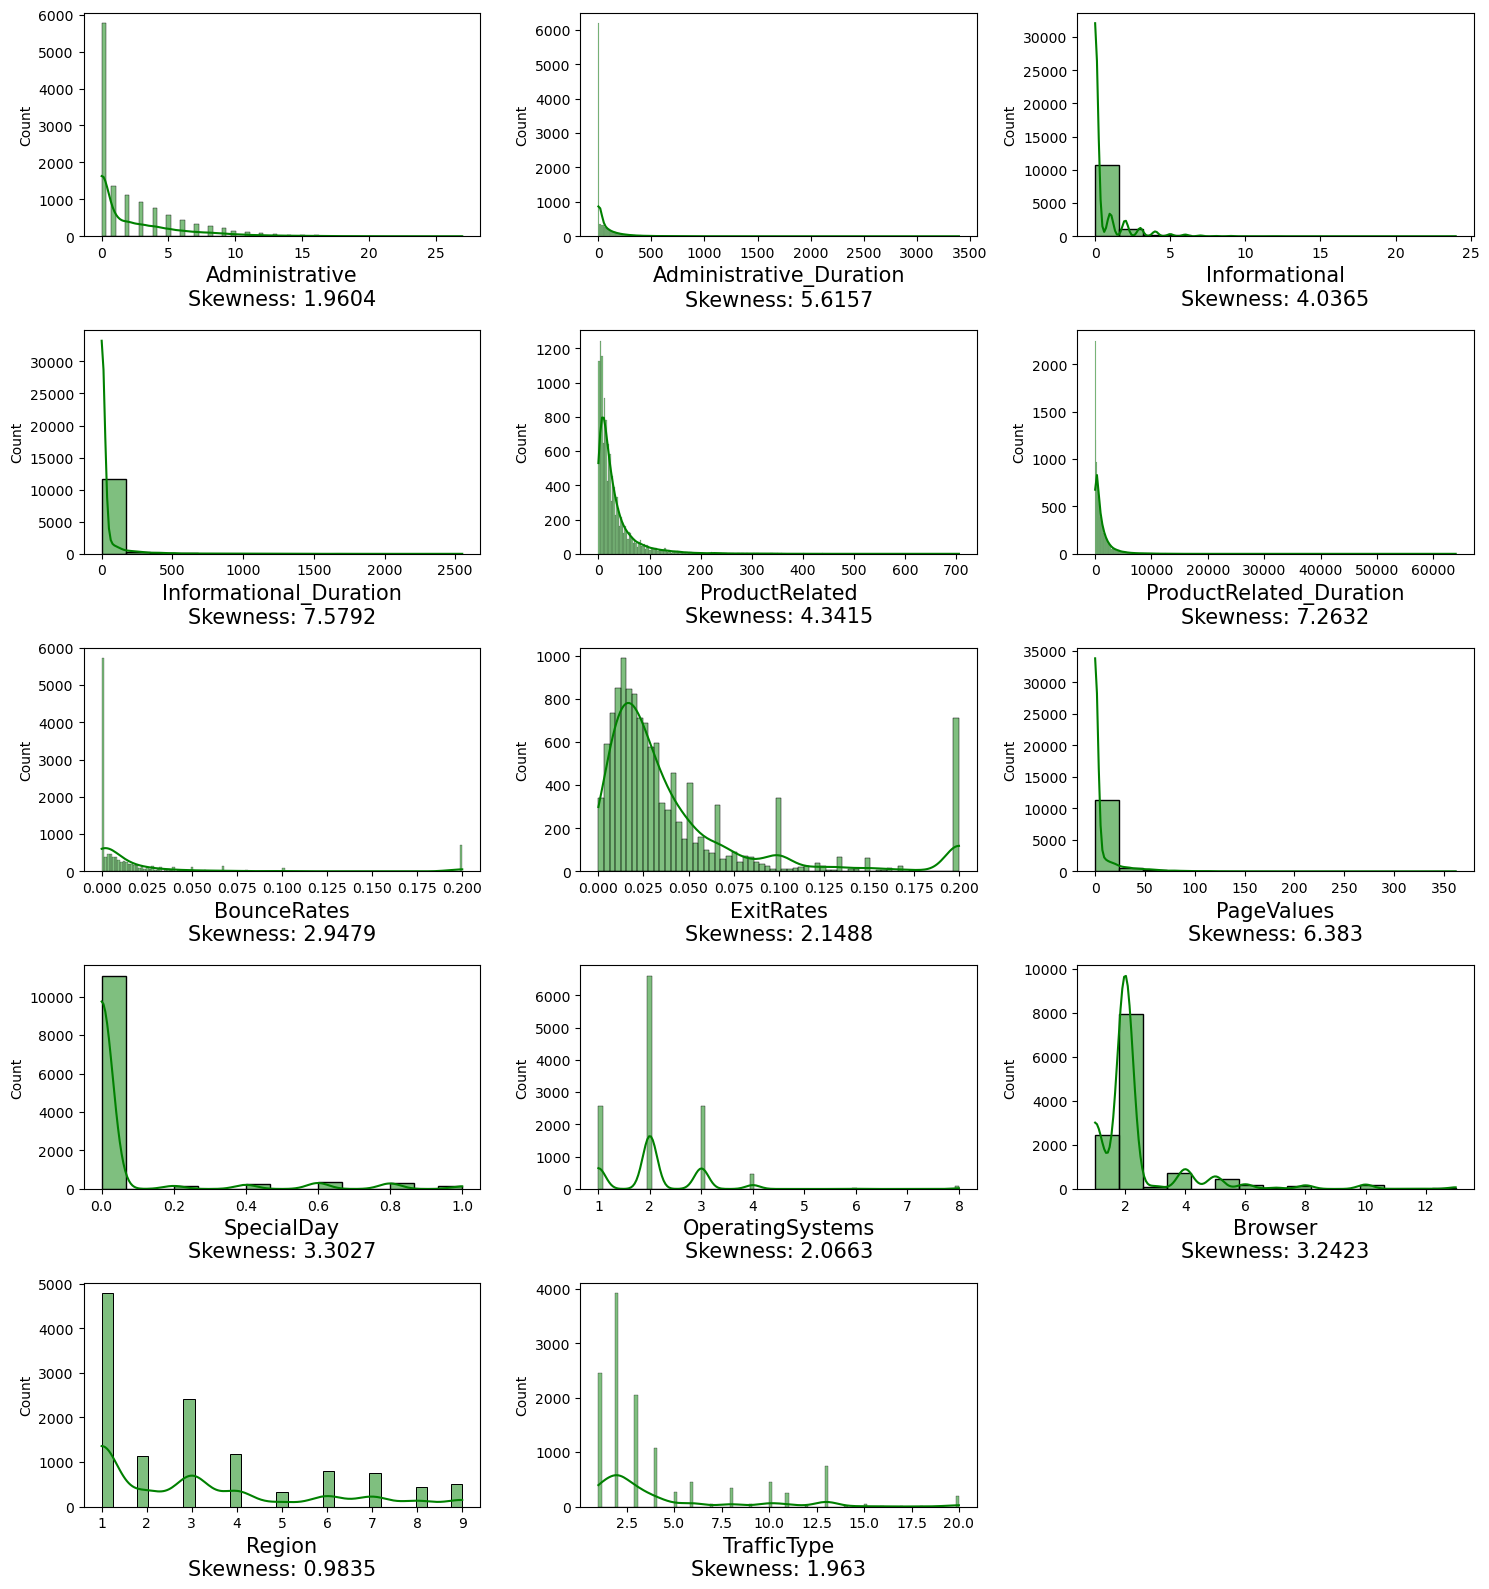

In [9]:
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(15,16),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(5,3,n)
    n+=1
    if df[i].skew() <=0.5 and df[i].skew()<=-0.5:
        sns.histplot(df[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}",fontsize=15)
    else:
        sns.histplot(df[i],color='Green',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}",fontsize=15)
plt.tight_layout()

📝**by visualzing kde-hist plot we can say that data is rightly skewed i.e most of the varaibles are not folowing normal distribution, to reduce the effect of skewness we can use various transformation method according to the data need**

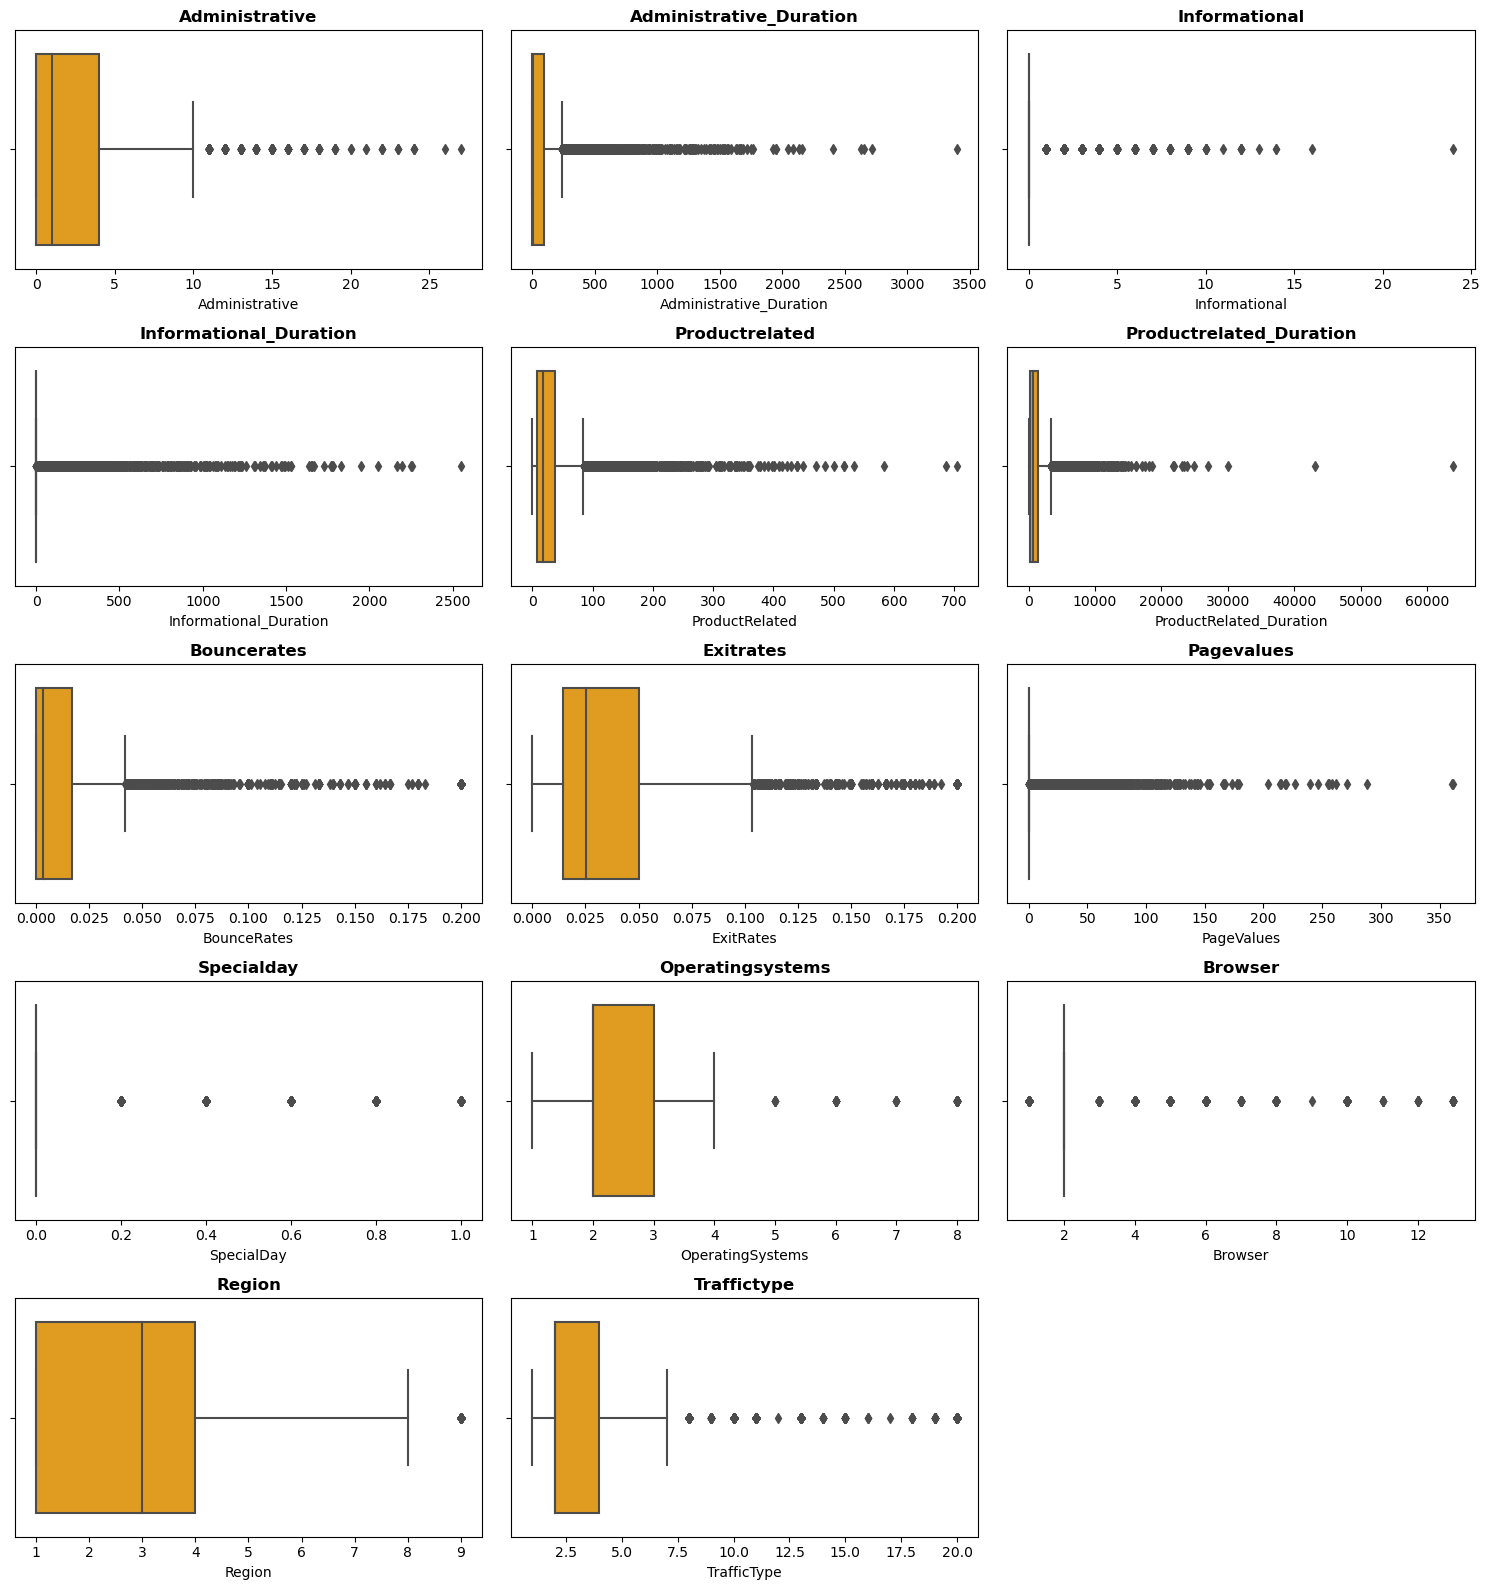

In [10]:
#checking for outliers
plt.figure(figsize=(15,16),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(5,3,n)
    n+=1
    sns.boxplot(df[i] ,color='Orange')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

📝*by visualizing boxplot we can see that there are lots of outliers in the data*

In [11]:
df1=df.copy()

In [12]:
#handelling outliers using IQR capping method
for i in df1.describe().columns:
    LC , q1,q3,UC=df1[i].quantile([0.01,0.25,0.75,0.99])
   
    ul=q3+1.5*(q3-q1)
    ll=q1-1.5*(q3-q1)
    df1[i]=df1[i].map(lambda x: UC if x>ul else LC if x<ll  else x)

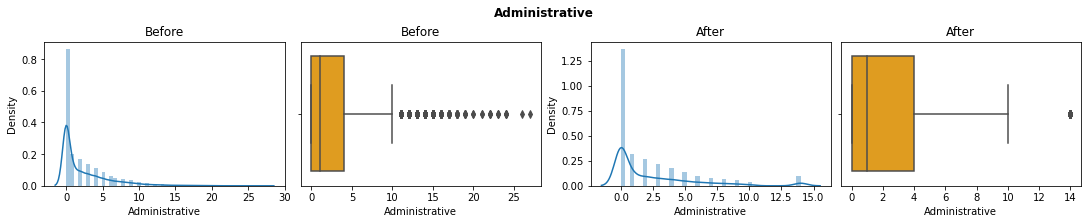

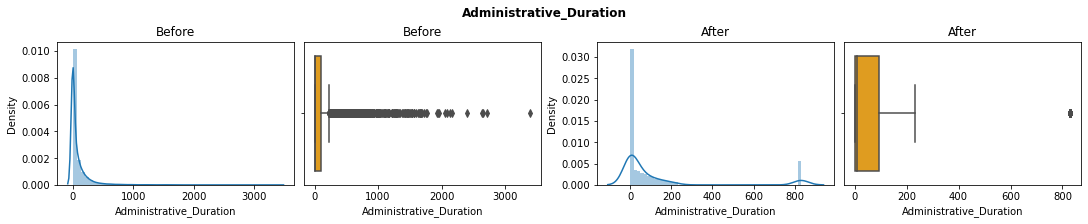

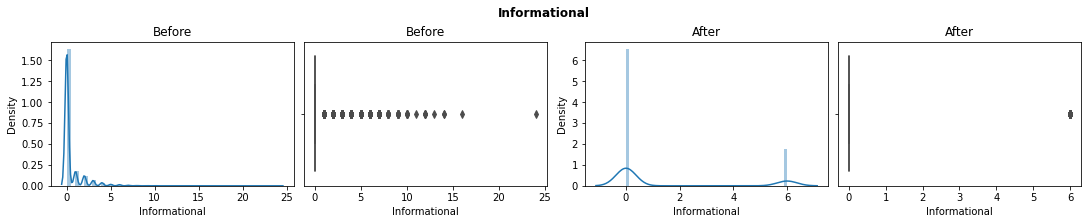

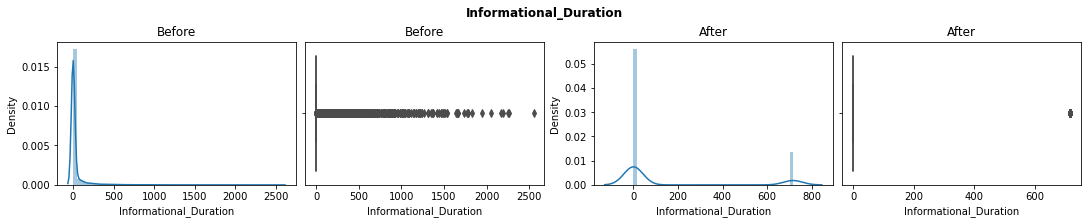

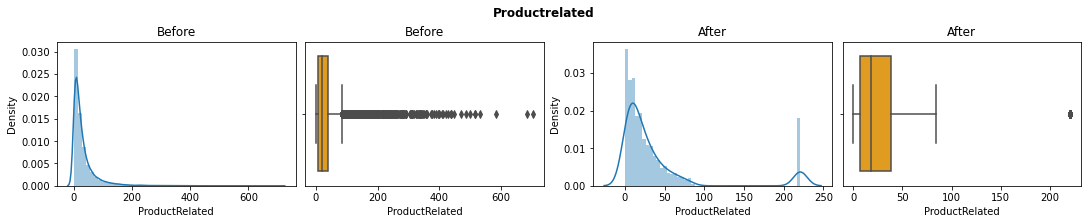

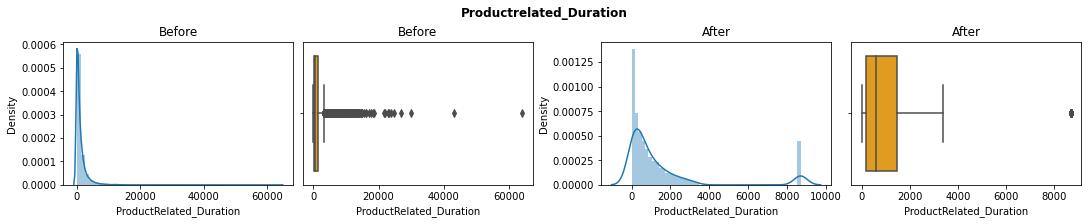

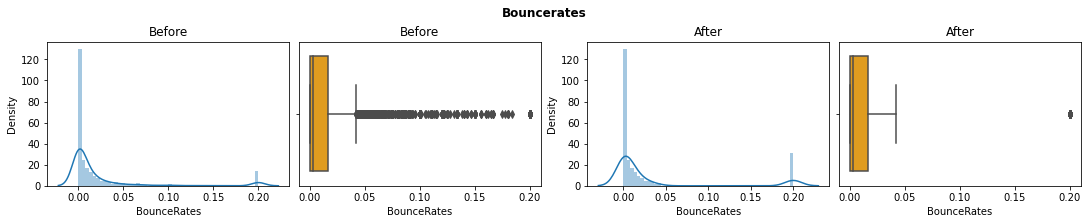

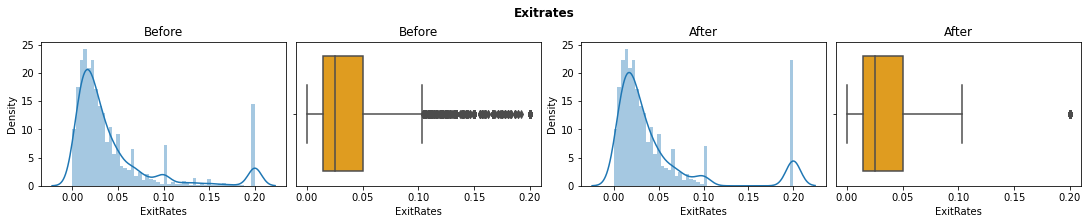

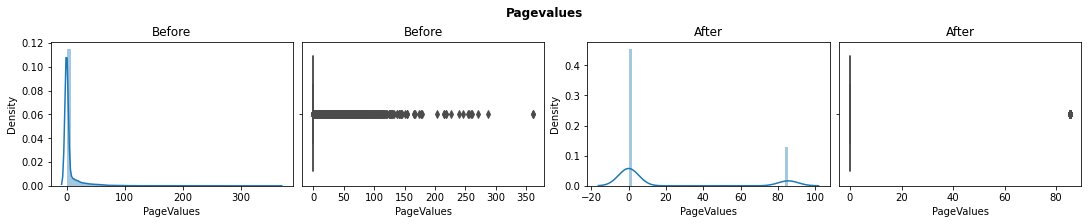

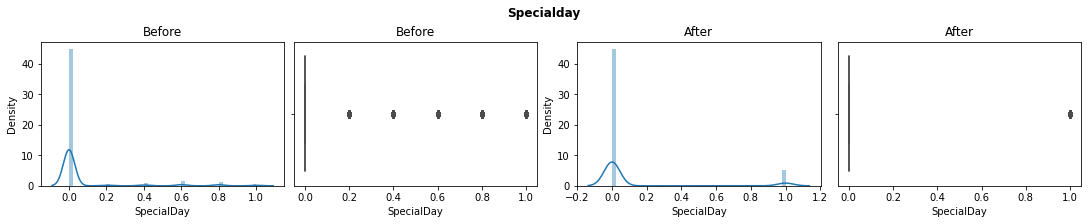

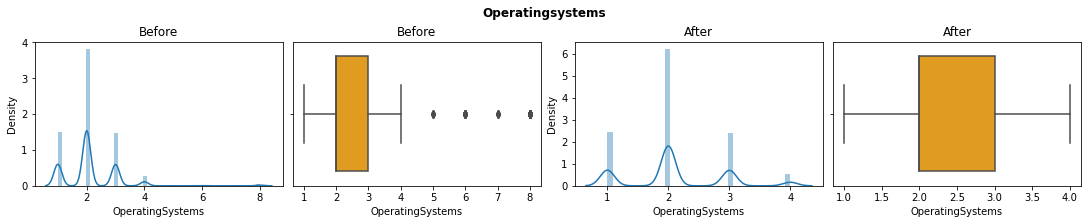

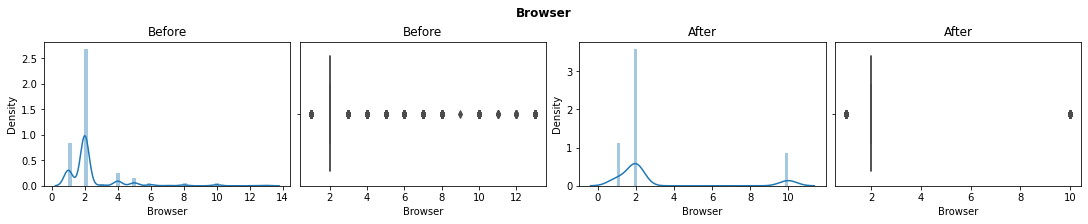

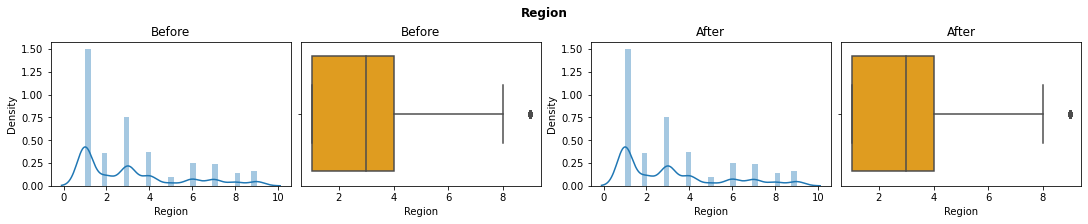

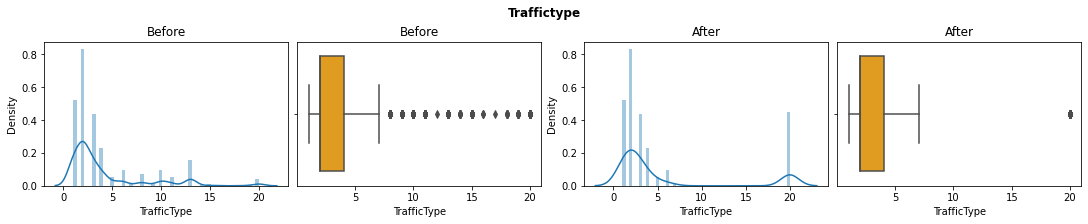

In [13]:
for i in df.describe().columns:
    # before treating outliers
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[i], ax=ax[0]).set(title="Before")
  sns.boxplot(df[i], ax=ax[1],color='mediumpurple').set(title="Before")
  # After treating outliers
  sns.distplot(df1[i], ax=ax[2]).set(title="After")
  sns.boxplot(df1[i], ax=ax[3],color='mediumpurple').set(title="After")
  plt.suptitle(f'{i.title()}',weight='bold')
  fig.show()


📝*here we can see outliers has been sucessfully capped and data looks more normal than before*

                                      🧮DISCRIPTIVE ANALYSIS(EDA)🧮

# **univariate analysis**

In [14]:
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

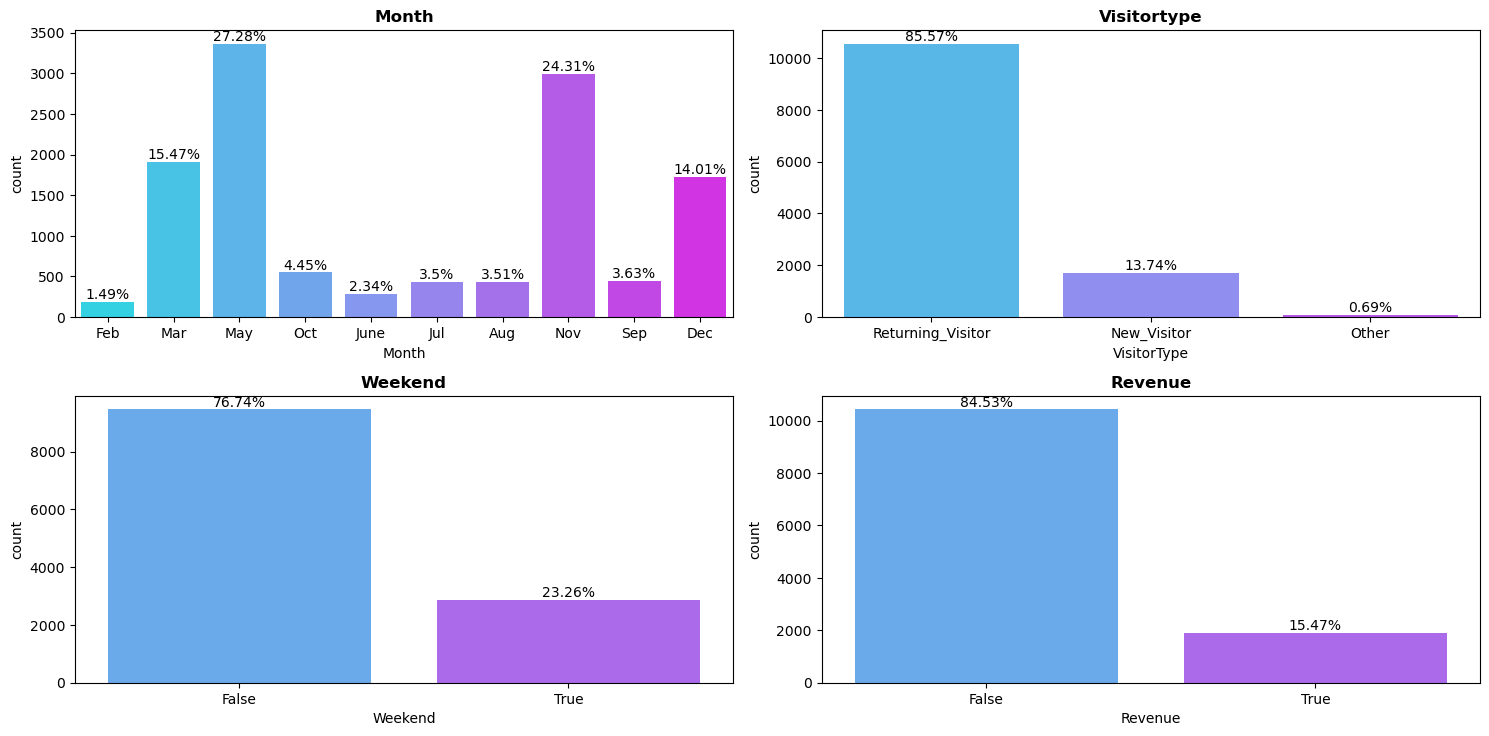

In [15]:
#plotting countplot for categoriacal variable
plt.figure(figsize=(15,18),dpi=100)
n=1
for i in df1.describe(include=['object','bool']).columns:
    plot=plt.subplot(5,2,n)
    n+=1
    sns.countplot(df1[i] ,palette='cool')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

📝**INFERENCE**:

1. *shopping website experienced most no of visitors in the month of `May(27.28%)` then followed by `Nov(24.31%)` and so on.*

2. *Most of the people who visited the shopping websites are `returning visitor(85.27%)` websites exprienced very less `new 
   visitors(15.47%)`only.
   
3. *Most of the people do not visited the shopping websites on `weekend(76.74%)` that means there is less infuence of          weekend on website traffic.

4. *Most of the people who visited the shopping websites do not contribute in `Revenue(84.53%)`. that means sales              conversion is not good as comapred to the no of visitors.

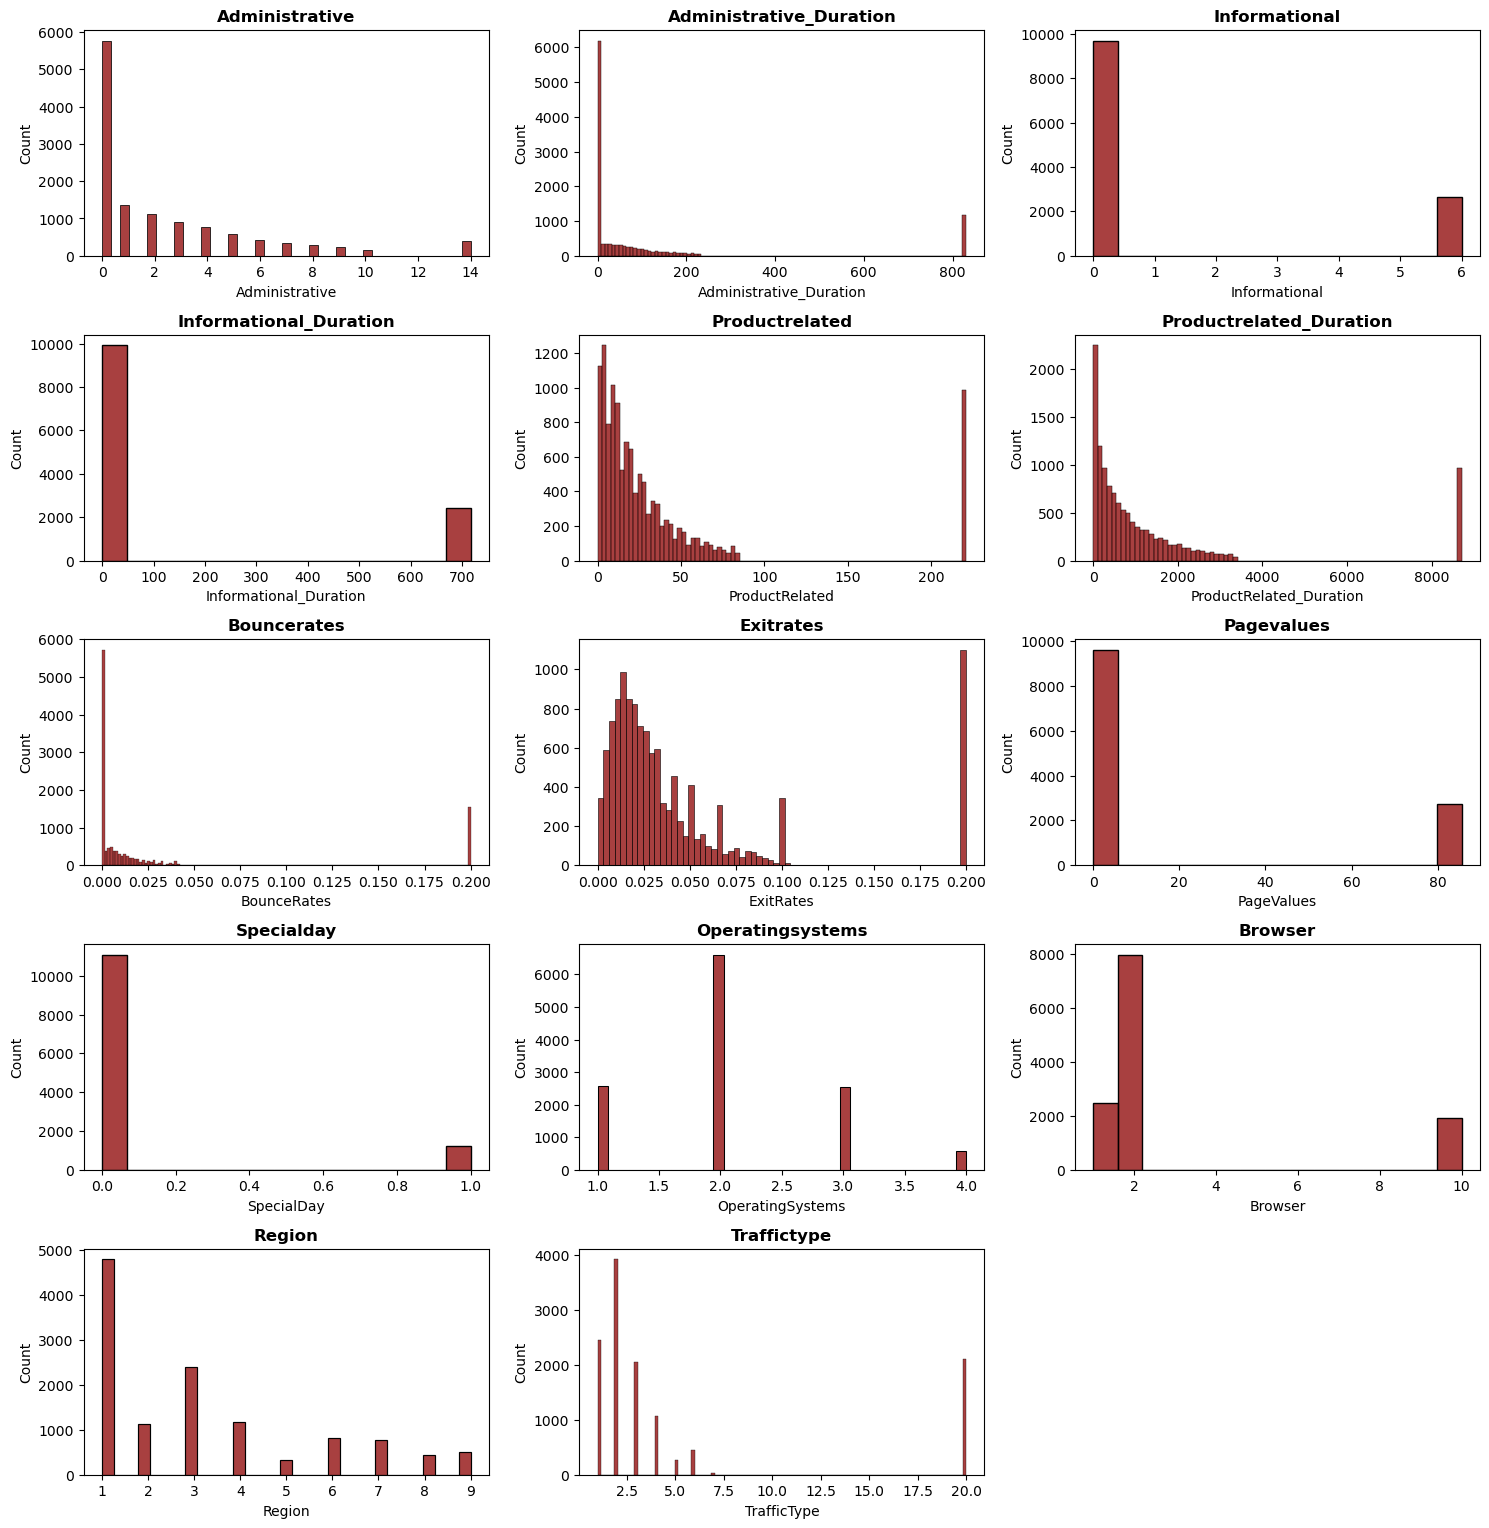

In [16]:
#checking distribution of numerical variables
plt.figure(figsize=(15,18),dpi=100)
n=1
for i in df1.describe().columns:
    plot=plt.subplot(6,3,n)
    n+=1
    sns.histplot(df1[i] ,color='DarkRed')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    

📝**INTREPETATION**:

1. people have visisted `product related page` more than the administrative and information pages in a particular session.

2. people have spent more time on `product related page` then folowed by `administrative `and `information pages` in a particular session.

3. On special day Time spent by people on website is close to `one min only` in a particular session.

4. the people from the region `ONE` visited the website most then followed by region 3, and region .

# **BIVARIATE ANALYSIS**

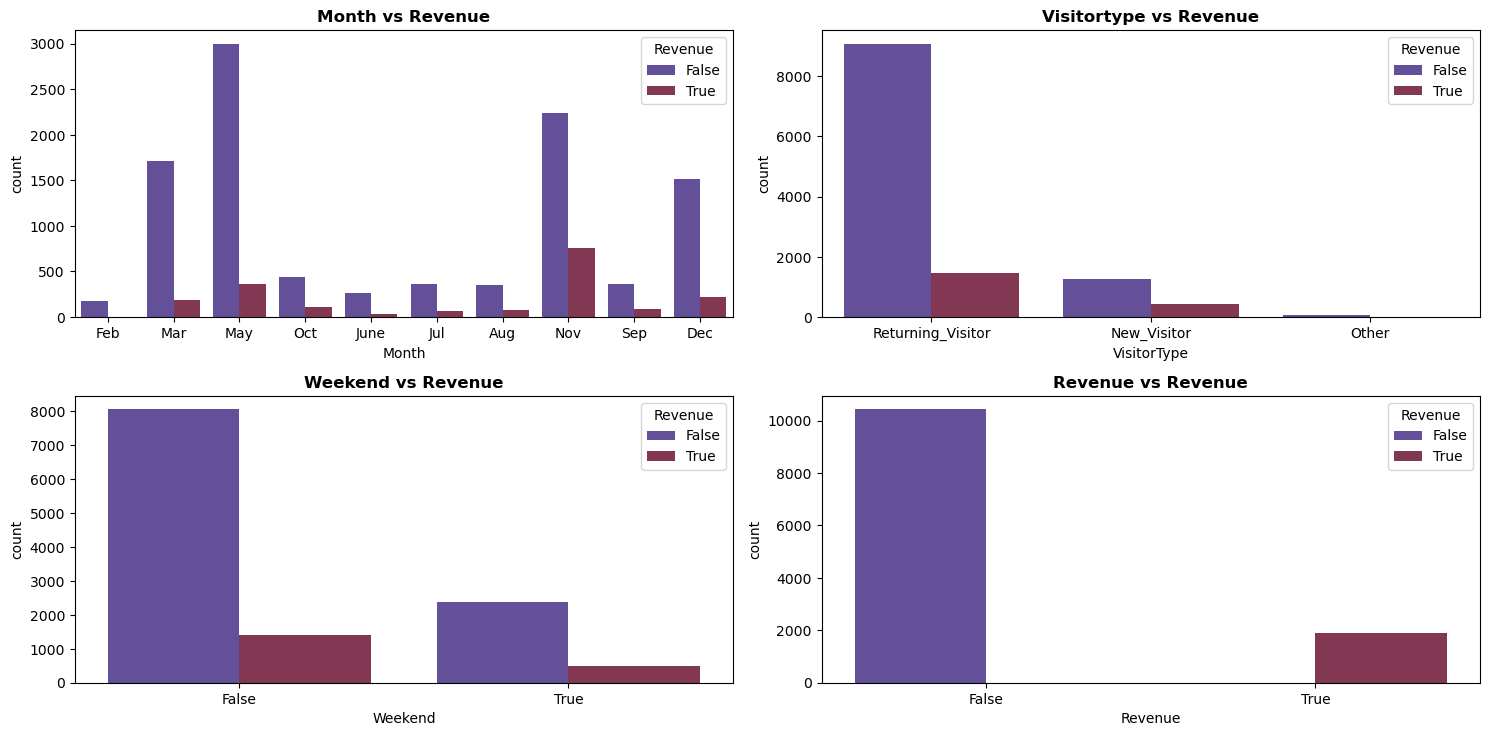

In [17]:
#Analizing the revenue with respect to other categorical varaible
#plotting countplot for categoriacal variable
plt.figure(figsize=(15,18),dpi=100)
n=1
for i in df1.describe(include=['object','bool']).columns:
    plot=plt.subplot(5,2,n)
    n+=1
    sns.countplot(df1[i] ,hue=df['Revenue'] ,palette='twilight')
    plt.title(f'{i.title()} vs Revenue',weight='bold')
    plt.tight_layout()

📝**INTERPRETATION**:

  1.most of the revenue generated is in the month of `NOVEMBER` and the folowed by `MAY , DEC AND MARCH`.
  
  2.most of the revenue generated is by the `Returning Customer`.
  
  3.the revenue generated on `WEEKEND` is more than weekdays.

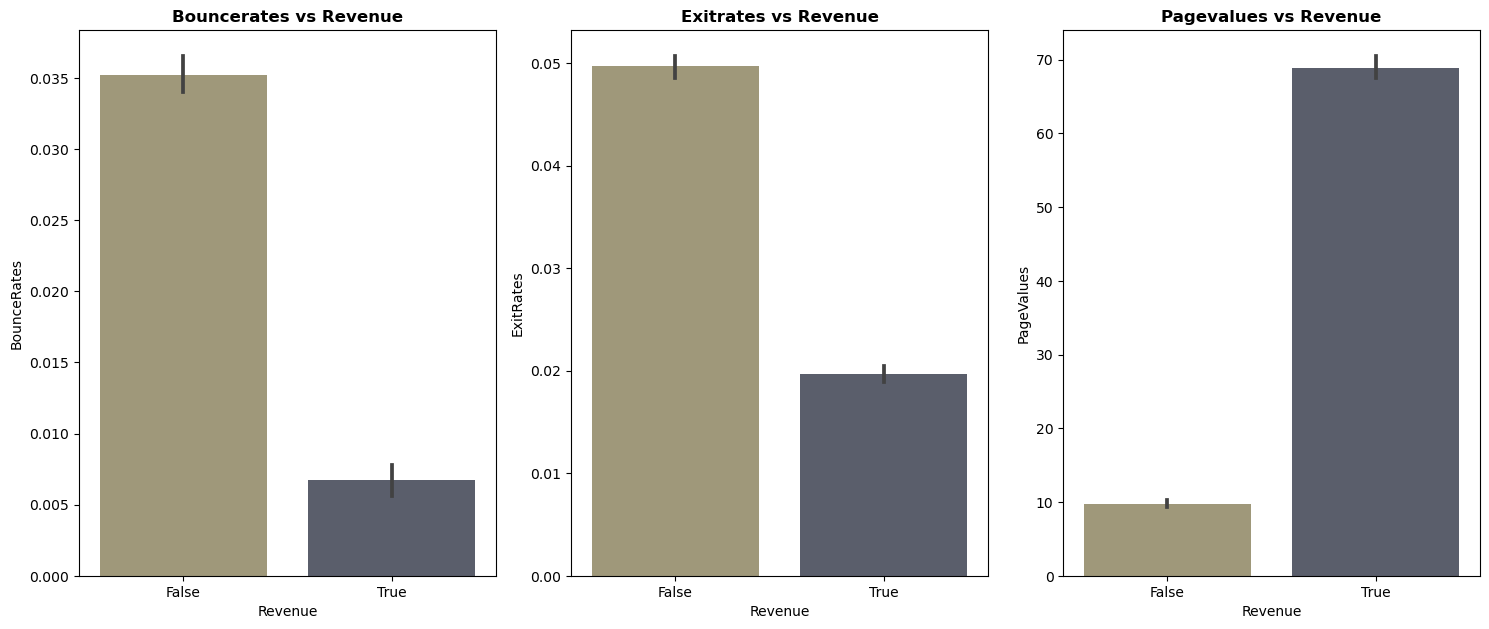

In [18]:
#analysing the factors affecting revenue
x=['BounceRates', 'ExitRates', 'PageValues']
plt.figure(figsize=(15,12),dpi=100)
n=1
for i in x:
    plot=plt.subplot(2,3,n)
    n+=1
    sns.barplot(data=df1 ,x='Revenue' ,y= df1[i]  ,palette='cividis_r',dodge=False)
    plt.title(f'{i.title()} vs Revenue',weight='bold')
    plt.tight_layout()

📝**INTERPRETATION**:

  On average user has visited a page approx 70 times to make a transaction


# **MULTIVARIATE ANALYSIS**

<AxesSubplot:>

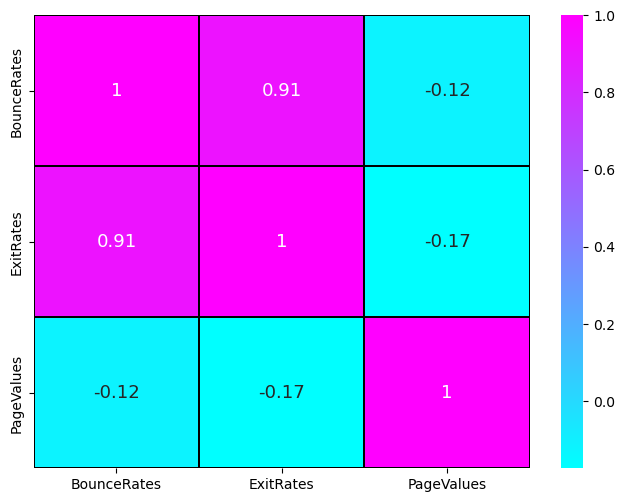

In [19]:
#analysing realation between BounceRates ,ExitRates,PageValues by heat map
x=['BounceRates','ExitRates','PageValues']
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df[x].corr() ,annot=True ,annot_kws={'size':13},cmap='cool',linewidths=0.1,linecolor='Black')

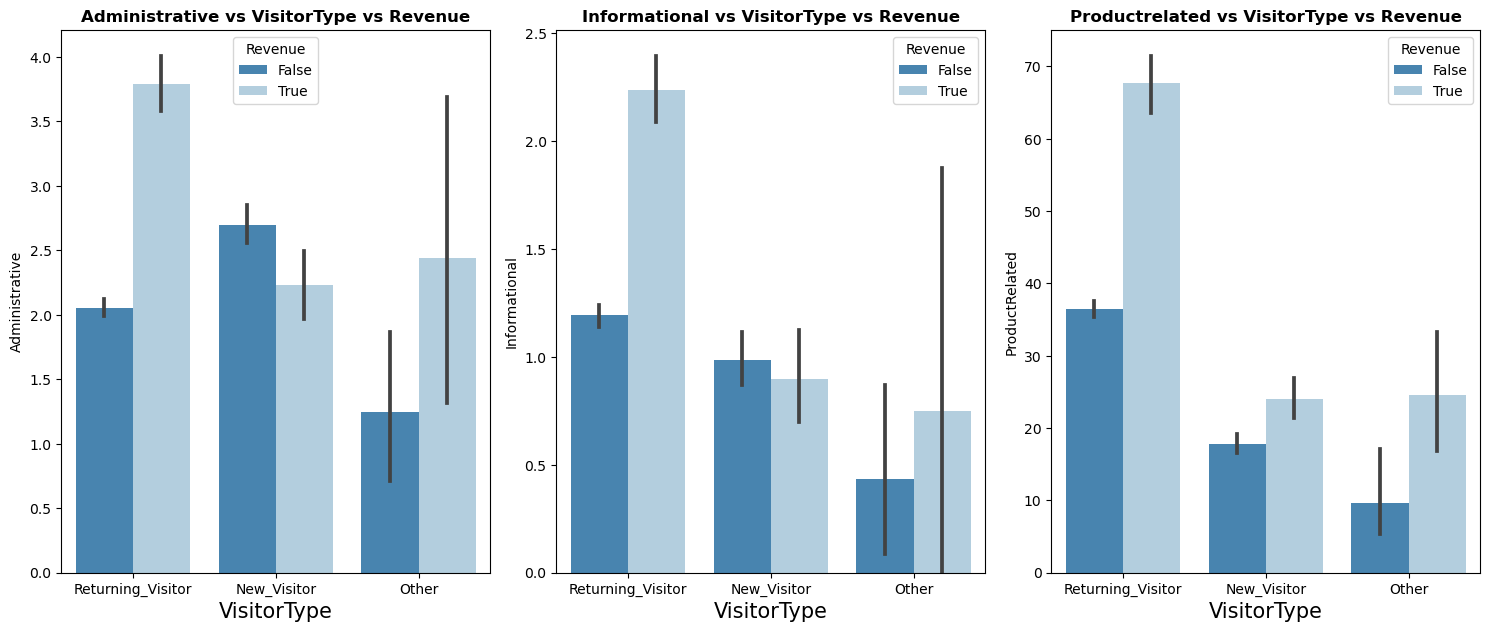

In [20]:

#analysing the factors affecting revenue
x=['Administrative', 'Informational', 'ProductRelated']
plt.figure(figsize=(15,12),dpi=100)
n=1
for i in x:
    plot=plt.subplot(2,3,n)
    n+=1
    sns.barplot(x=df1['VisitorType'],y=df1[i] ,hue=df1['Revenue'] ,palette='Blues_r')
    plt.title(f'{i.title()} vs VisitorType vs Revenue',weight='bold')
    plt.xlabel('VisitorType',fontsize=15)
    plt.tight_layout()

⌨️**INTERPRETATION**:

1.In terms of `Revenue` Contribution returned vistors contributed the most and for that they have visted the websites `product related page` most, and then followed by `Adminitrative page`.

2.`new vistors` also preffered product related page` most, and then followed by `Adminitrative page` in terms of revenue contribution

                                     🧮UNSUPERVISED LEARNING🧮

*Data preperation*

In [21]:
#dropping insignificant variable
df1.drop(columns=['Month','Revenue'],inplace=True)

In [22]:
#scaling the data using standard scaler
x=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']
df1[x]=df1[x].apply(lambda x: (x-x.mean())/x.std())

In [23]:
#encoding categoriacal variables by using one hot encoding
df1=pd.get_dummies(data=df1,columns=['VisitorType','Weekend'],drop_first=True)

# Perfgorming K-means

*finding the cluster sum of square(wcss) for the number (1,10)*

In [24]:
#creating empty list
wcss=[]
#performing k-means for optimal value of k
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=10)
    #fitting the model using fit()
    kmeans_model=kmeans.fit(df1)
    kmeans_wcss=kmeans_model.inertia_
    wcss.append(kmeans_wcss)

In [25]:
print('wcss',wcss)

wcss [176413.62935929594, 143864.0130748309, 123420.88695913382, 111660.02868216466, 103166.24664202715, 96744.73960676511, 90210.32899852731, 84529.01094462152, 79682.99522732006]


In [26]:
plt.rcParams['figure.figsize']=[10,8]

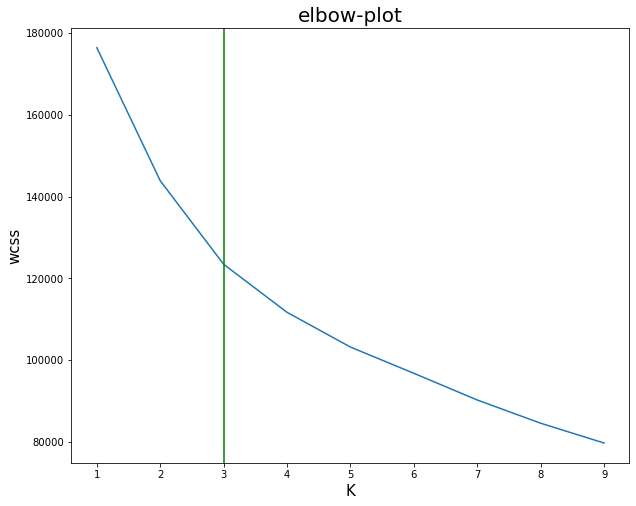

In [27]:
#plotting elbow to visualize the otimal value of k
plt.plot(range(1,10),wcss)
plt.title('elbow-plot',fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.axvline(x=3,color='Green')
plt.show()

💹**INTERPRETATION**:In this elbow plot there is a elbow point for k=3, before this elbow point the value of k is decreasing slowly but after after k=3 , the value of k is dcreasing slowly.

*Lets consider silhoutte score method to validate the optimal value of k that we found using elbow plot*

In [28]:
#calculating silhoutte score
silhoutte=[]
#creating a list of value of k
n_cluster=[2,3,4,5,6,7,8,9]
#performing k-means for optimal value of k
for i in n_cluster:
    kmeans=KMeans(n_clusters=i ,random_state=10)
    #fitting the model using fit()
    predict=kmeans.fit_predict(df1)
    score=silhouette_score(df1,predict,random_state=10)
    silhoutte.append(score)
    print('for {} clusters silhoutte score is {})'.format(i ,score))

for 2 clusters silhoutte score is 0.26499631671949475)
for 3 clusters silhoutte score is 0.2537100892809282)
for 4 clusters silhoutte score is 0.26121415567248263)
for 5 clusters silhoutte score is 0.2199419272481006)
for 6 clusters silhoutte score is 0.21890192708777836)
for 7 clusters silhoutte score is 0.22740985785304893)
for 8 clusters silhoutte score is 0.2284547123093993)
for 9 clusters silhoutte score is 0.22465836928324828)


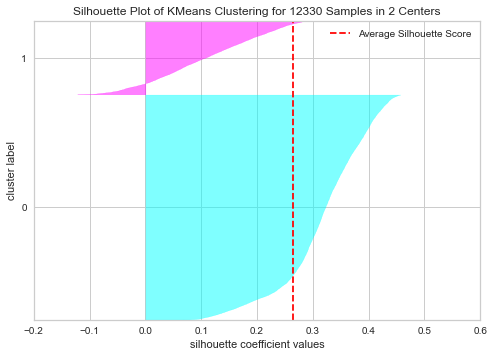

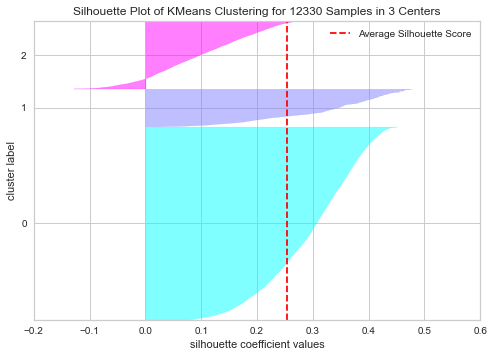

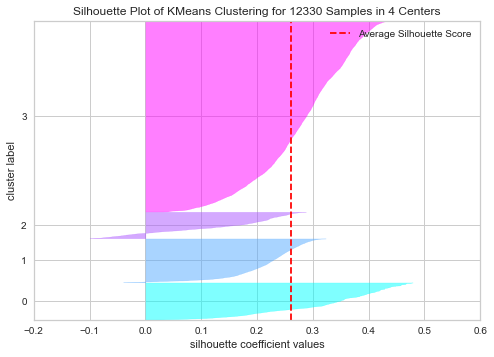

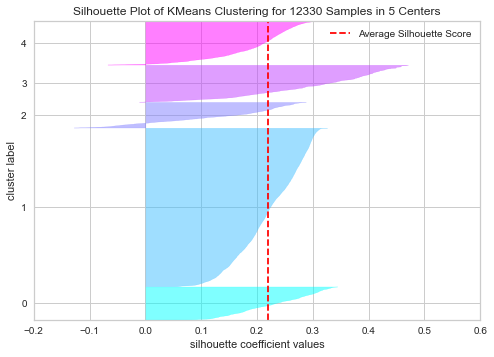

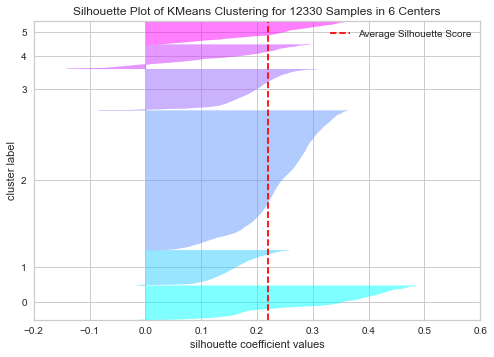

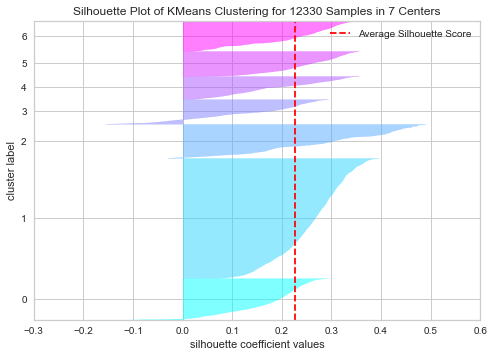

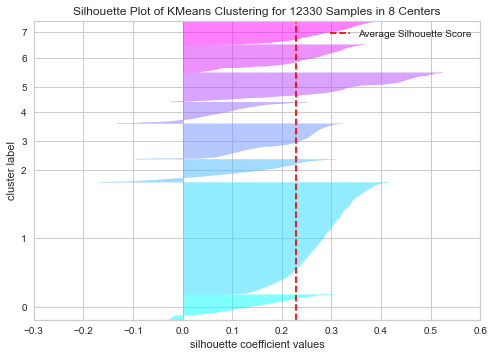

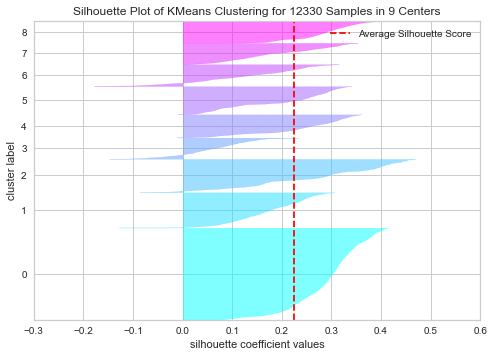

In [29]:
#plotting silhoutte plot 
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
X,y=load_credit()
X=df1
n_cluster=[2,3,4,5,6,7,8,9]
for i in n_cluster:
    kmeans=KMeans(n_clusters=i ,random_state=10)
    silhouette_visualizer(estimator=kmeans, X=df1,colors='cool')

**Interpretation**:'💹*by visualizing the above silhoutte plot , we can see that thare are outliers( where the coefficients is less than 0) for clusters **2,3,4,5,6,7,8,9** , but comparing to all cluster for k =2 silhoutte score is high and and also have less outliers*
**'🧮so the optimal value of k is 2


In [30]:
#building the cluster using k-mean for the optimal value of k
clustersk=KMeans(n_clusters=2,random_state=10)
#fitting the model using fit()
clustersk.fit(df1)
df['Kmeans_clusters']=clustersk.labels_

# Analizing the clusters

In [31]:
#checking the size of each cluster and plotting it using bar graph
x=df['Kmeans_clusters'].value_counts().sort_index(ascending=True)
x

0    9302
1    3028
Name: Kmeans_clusters, dtype: int64

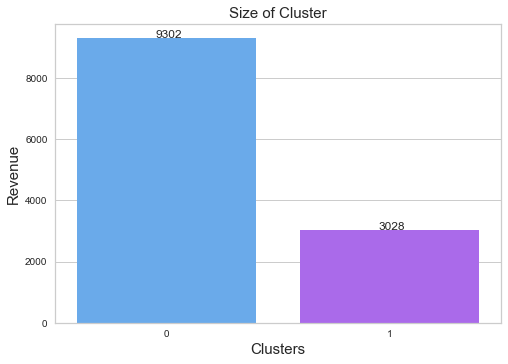

In [32]:
sns.barplot(x=x.index ,y=x.values, palette='cool')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.text(x=-0.05 ,y=x[0]+1 ,s=x[0])
plt.text(x=0.95 ,y=x[1]+1 ,s=x[1])

plt.show()

📝**FIrst cluster has highest numbers of cluster points i.e 9302 cluster points**

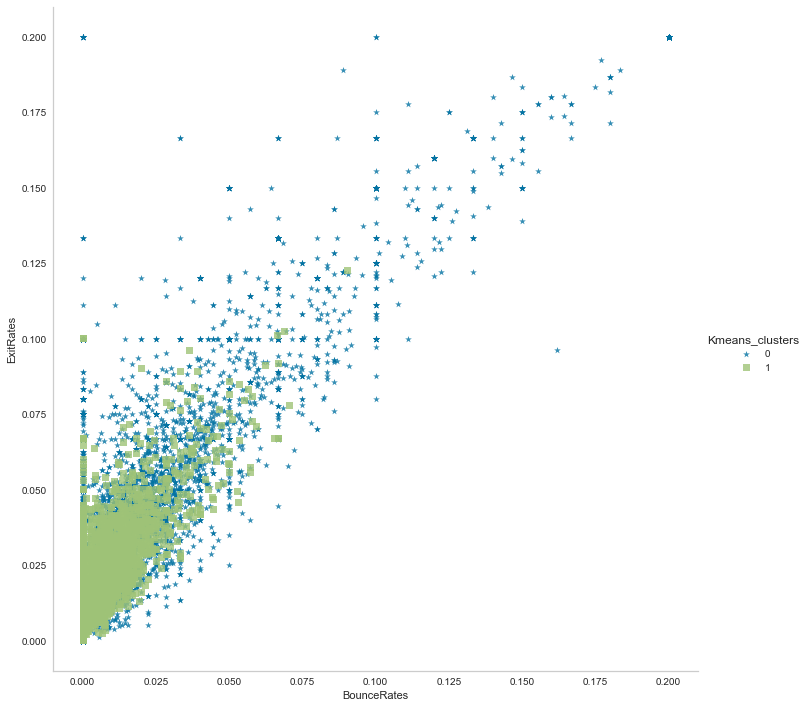

In [33]:
#analysing cluster with the help of scatter plot
sns.lmplot(data=df ,x='BounceRates',y='ExitRates' ,hue='Kmeans_clusters',markers=['*', ','],size=10,fit_reg=False)
plt.grid(False)
plt.show()

**Interpretation**:By visualizing the cluster we can say that

1.the cluster represented by the  *Blue Star(✡️)has largest number of clusters then followed by **Green Sqauare(🟩)*

2.We can see some of the clusters are overlapped beacause dimension of dataset is more than two and we have only consider two variables to plot the cluster

3.we can see some clusters point are too far away from their clusters thats because outliers we have observed during visualizing silhoutte plot                                                                                                                                   

**calculating the stastical summary of each clusters**

In [34]:
#calculating the stastical summary for numerical variable for cluster1
df[df['Kmeans_clusters']==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Kmeans_clusters
count,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000
mean,1.367340,44.495038,0.015696,0.074738,19.214900,688.666164,0.027124,0.050064,5.001309,0.067921,2.127177,2.391099,3.171469,4.177919,0.000000
std,2.139672,110.731388,0.133477,5.110598,19.134103,802.999416,0.054654,0.053501,18.423475,0.207713,0.941382,1.783919,2.410053,4.128520,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,123.350000,0.000000,0.015468,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,13.000000,409.793561,0.001481,0.030000,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000
75%,2.000000,51.400000,0.000000,0.000000,26.000000,955.227083,0.022222,0.060000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,18.000000,1946.000000,3.000000,478.916667,159.000000,7514.790476,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,0.000000


In [35]:
#calculating the stastical summary for categorical variable for cluster1
df[df['Kmeans_clusters']==0].describe(include=[object,bool])

,Month,VisitorType,Weekend,Revenue
count,9302,9302,9302,9302
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,2637,7823,7235,8160


🧮**INFERENCE**: From the above summary we can conclude that the average `administrative duration` , `Informational page duration` and `Product realated Duaration` is `44.49`,`0.074`,`688.67` respectively. The average `page value` is `5.00`.

2. More than `28%` people in this cluster visited the website in the month of `May`,
3. More than `85% ` website visitor in this cluster are `returning Visitor`
3. More than `77% ` website visitor in this cluster have not visited the website on `Weekend`.
4. More than `87% ` website visitor in this cluster have not contributed in `revenue`.

In [36]:
#calculating the stastical summary for numerical variable for cluster2
df[df['Kmeans_clusters']==1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Kmeans_clusters
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000
mean,5.226882,192.404434,2.002312,140.141826,70.182299,2749.421478,0.007037,0.021595,8.617031,0.041480,2.114267,2.252642,3.073316,3.736790,1.000000
std,4.430990,270.369202,1.880910,256.518713,70.507892,3119.252974,0.009657,0.014564,18.748643,0.167524,0.812128,1.489500,2.374273,3.670309,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,31.000000,1.000000,7.650000,24.000000,866.634524,0.000000,0.011744,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,4.000000,110.150000,2.000000,46.500000,47.000000,1828.829325,0.003922,0.018524,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,8.000000,247.139773,3.000000,148.500000,94.000000,3649.832292,0.009922,0.028062,9.222683,0.000000,2.000000,2.000000,4.000000,4.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.090323,0.122427,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [37]:
#calculating the stastical summary for categorical variable for cluster2
df[df['Kmeans_clusters']==1].describe(include=[object,bool])

,Month,VisitorType,Weekend,Revenue
count,3028,3028,3028,3028
unique,10,3,2,2
top,Nov,Returning_Visitor,False,False
freq,955,2728,2227,2262


🧮**INFERENCE**: From the above summary we can conclude that the average `administrative duration` , `Informational page duration` and `Product realated Duaration` is `192.40`,`140.141`,`2749.42` respectively. The average `page value` is `8.61`.

2. More than `31%` people in this cluster visited the website in the month of `Nov`,
3. More than `90% ` website visitor in this cluster are `returning Visitor`
3. More than `73% ` website visitor in this cluster have not visited the website on `Weekend`.
4. More than `74% ` website visitor in this cluster have not contributed in `revenue`.

# 🧮Performing agglomerative clustering

In [38]:
#calculating cophanatic coefficient to find the best linkage method
cophen_coeff={}
lm=['single','complete','average','ward']

for i in lm:
    link_mat=linkage(df1,method=i)
    #calculating euclidean distance
    euclid_dist=euclidean_distances(df1)
    #considering only the array of upper triangular matrix
    dist_array=euclid_dist[np.triu_indices(len(df1) ,k=1)]
    #calculating cophenetic coefficient
    coeff, cophenet_dist=cophenet(link_mat ,dist_array)
    cophen_coeff[f'{i}']=[coeff]

In [39]:
cophen_coeff

{'single': [0.6050070703900188],
 'complete': [0.6955916593652711],
 'average': [0.8207174474945641],
 'ward': [0.6836993148882717]}

🧮*the value of cophenetic correlation coefficient for `average` linkage method is `0.8207174474945641` which is high considering of all linkage method, so the linkage quality will be good if we use average linkage method*

In [40]:
#to perform hierarchical clustering, we need to specify the number of required clusters
#finding linkage matrix by using 'average' linkage method
link_mat=linkage(df1,method='average')
link_mat[0:5]

array([[0.0000e+00, 1.2850e+03, 0.0000e+00, 2.0000e+00],
       [1.6000e+01, 2.1750e+03, 0.0000e+00, 2.0000e+00],
       [5.6000e+01, 6.9000e+01, 0.0000e+00, 2.0000e+00],
       [2.1720e+03, 2.5490e+03, 0.0000e+00, 2.0000e+00],
       [4.9130e+03, 1.2333e+04, 0.0000e+00, 3.0000e+00]])

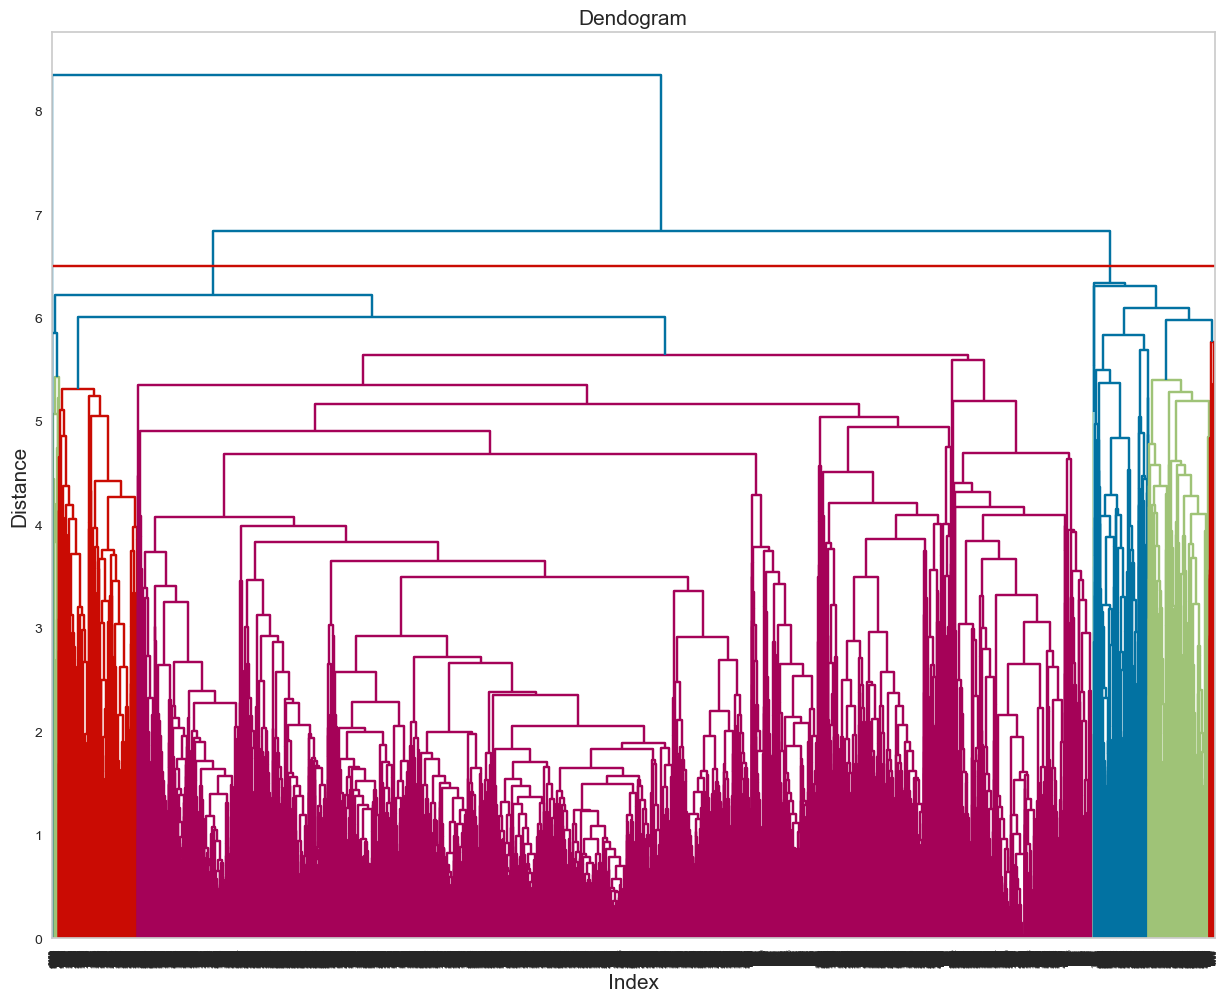

In [41]:
#plotting dindogram to find optimal value of clusters
plt.figure(figsize=(15,12),dpi=100)
hierarchy.dendrogram(link_mat)
plt.axhline(y=6.5,color='r')
plt.title('Dendogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.grid(False)
plt.show()

**Interpretation**:'💹 By visualizing the dindogram plot we can see that the number of cluster(=2) is nearly constant after the distance 6.5 when we go down, so number of optimal cluster is 2

lets conside the silhoutte score method to validate the optimal value found with the help of dindogram plot

In [42]:
#creating list of k
k=[2,3,4,5,6,7]
silhoutte=[]
for i in k:
    model=AgglomerativeClustering(n_clusters=i,linkage='average')
    predict=model.fit_predict(df1)
    #calculating silhoutte score
    score=silhouette_score(df1,predict,random_state=10)
    silhoutte.append(score)
    print('for {} cluster the silhoutte_score is {})'.format(i,score))

for 2 cluster the silhoutte_score is 0.38226040294607905)
for 3 cluster the silhoutte_score is 0.296884418707414)
for 4 cluster the silhoutte_score is 0.2543322145084008)
for 5 cluster the silhoutte_score is 0.22632206423615084)
for 6 cluster the silhoutte_score is 0.18599381031922416)
for 7 cluster the silhoutte_score is 0.17972272755119378)


[]

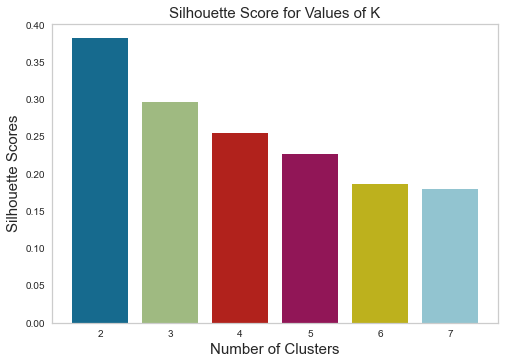

In [43]:
#plotting the silhoutte score using barplot
sns.barplot(x=k, y=silhoutte)
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)
plt.grid(False)
plt.plot()

**Interpretation**:💹 here we can see that silhoutte score is high for cluster 2 and we have visualized the optimal number of cluster is 3 with dindogram as well

# 🧮Building clusters using optimal no of clusters

In [44]:
#initiating Agglomerative clustering() with  clusters
clusters=AgglomerativeClustering(n_clusters=2, linkage='average' )
#fitting the model using fit()
agglo_model=clusters.fit(df1)
df['agglo_cluster']=agglo_model.labels_ 

In [45]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Kmeans_clusters,agglo_cluster
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False,0,0
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False,0,0


# 🧮 Analizing the clusters

In [46]:
y=df['agglo_cluster'].value_counts().sort_index(ascending=False)
y

1        1
0    12329
Name: agglo_cluster, dtype: int64

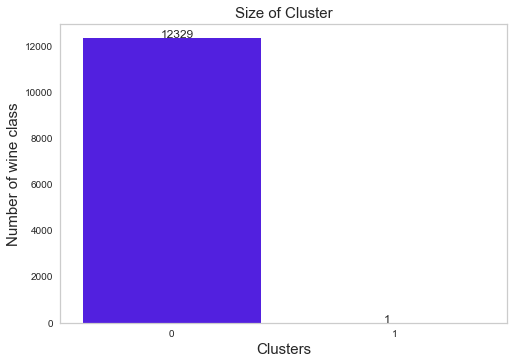

In [47]:
#plotting barplot to visualize size of clusters in each clusters
sns.barplot(x=y.index ,y=y.values,palette='gnuplot2')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of wine class', fontsize = 15)
plt.text(x=-0.05 ,y=y[0]+1 ,s=y[0])
plt.text(x=0.95 ,y=y[1]+1 ,s=y[1])


plt.grid(False)
plt.show()

🧮 the 1st nd cluster has highest number of cluster i.e 12329 cluster

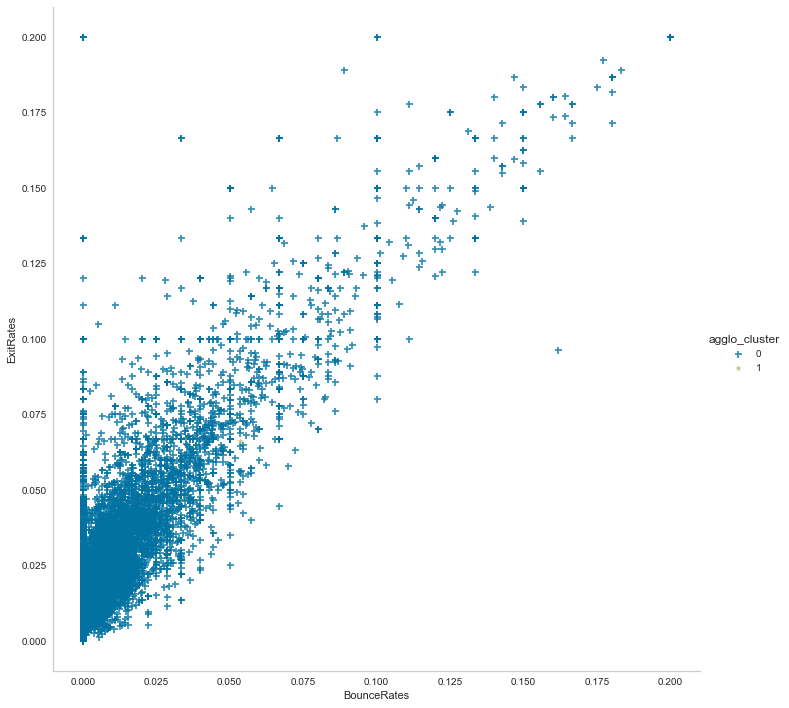

In [48]:
#analysing cluster with the help of scatter plot
sns.lmplot(data=df ,x='BounceRates',y='ExitRates' ,hue='agglo_cluster',markers=['+', '*'],fit_reg=False,size=10,
           )
plt.grid(False)
plt.show()

'🧮**Interpretation**:By visualizing the cluster we can say that

1.the cluster represented by the *Blue plus(➕')* has largest number of clusters then folowed by *green star(✡️) which has only one cluster points*

2.We can see some of the clusters are overlapped beacause dimension of dataset is more than two and we have only consider two variables to plot the cluster


'✡️**calculating the stastical summary of each clusters**

In [49]:
#calculating the stastical summary for numerical variable for cluster1
df[df['agglo_cluster']==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Kmeans_clusters,agglo_cluster
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,2.315354,80.825166,0.503285,34.456882,31.716035,1194.062023,0.022189,0.043071,5.889736,0.061432,2.123530,2.356233,3.146889,4.069511,0.245519,0.000000
std,3.321853,176.784779,1.269817,140.744457,44.444280,1912.238151,0.048489,0.048598,18.569114,0.198925,0.909824,1.714669,2.401110,4.025324,0.430412,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.873809,0.003111,0.025152,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.300000,0.000000,0.000000,38.000000,1464.000000,0.016774,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,0.000000


In [50]:
#calculating the stastical summary for categorical variable for cluster1
df[df['agglo_cluster']==0].describe(include=[object,bool])

,Month,VisitorType,Weekend,Revenue
count,12329,12329,12329,12329
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9461,10421


🧮**INFERENCE**: From the above summary we can conclude that the average administrative duration , Informational page duration and Product realated Duaration is 80.82,34.45,1194.06 respectively. The average page value is 5.88.

2. More than 27% people in this cluster visited the website in the month of May,
3. More than 85% website visitor in this cluster are returning Visitor
4. More than 76% website visitor in this cluster have not visited the website on Weekend.
5. More than 84% website visitor in this cluster have not contributed in revenue.

# 🔶Performing DBSCAN clustering

In [51]:
#calculating euclidiean distance
euclid_dist=euclidean_distances(df1)
#considering only the array of upper triangular matrix
dist_array=euclid_dist[np.triu_indices(len(df1) ,k=1)]
# calculate the minimum euclidean distance between the data points 
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points 
print('Maximum Distance:', dist_array.max())

Minimum Distance: 0.0
Maximum Distance: 11.961717571701683


From the above output we can see that the euclidean distance between the data points ranges from 0 to 11.91 and while increasing the epsilon, we get 3 clusters at epsilon = 0.8; after 0.8, the clusters start to mmerge into a single cluster.

In [52]:
#initiating DBSCAN to build the cluster
cluster_db=DBSCAN(eps=0.8 ,min_samples=15)
model_db=cluster_db.fit(df1)
df['cluster_DB']=model_db.labels_

In [53]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Kmeans_clusters,agglo_cluster,cluster_DB
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,...,1,1,1,1,Returning_Visitor,False,False,0,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,...,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,...,4,1,9,3,Returning_Visitor,False,False,0,0,-1
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,...,3,2,2,4,Returning_Visitor,False,False,0,0,2
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,...,3,3,1,4,Returning_Visitor,True,False,0,0,-1


# 🧮 **Analizing the clusters**

In [54]:
df['cluster_DB'].value_counts()

-1     6378
 1     1132
 6      490
 7      390
 9      380
       ... 
 57      15
 47      15
 65      15
 43      15
 64      15
Name: cluster_DB, Length: 67, dtype: int64

From the above output we can see that the DBSCAN algorithm has created 67 clusters. The data points labeled as -1 are the outliers identified by DBSCAN. So DBscan is working poorly on this dataset*

# ⌨️Principal Component Analysis (PCA)

In [55]:
#calculating covariance metrix ,eigen values and eigen vectors to find the optimal value of principal components
cov_metrix=np.cov(df1.T)
cov_metrix[0:5]

array([[ 1.        ,  0.65701959,  0.36760753,  0.3667327 ,  0.40534257,
         0.36456909, -0.23953483, -0.31358191,  0.35091605, -0.09951903,
        -0.00187574, -0.03522401, -0.00539488, -0.03129802, -0.00177763,
        -0.00847489,  0.01075782],
       [ 0.65701959,  1.        ,  0.27509904,  0.27343209,  0.26125278,
         0.27155213, -0.15324632, -0.21227246,  0.25256124, -0.07494003,
        -0.00381881, -0.02617661,  0.00328347, -0.00669803, -0.00141808,
        -0.00593   ,  0.00883051],
       [ 0.36760753,  0.27509904,  1.        ,  0.94513825,  0.34348182,
         0.33768982, -0.15139916, -0.20355477,  0.23623112, -0.05110054,
        -0.00382619, -0.03862267, -0.01868853, -0.03210513, -0.00220486,
         0.01991682,  0.01841502],
       [ 0.3667327 ,  0.27343209,  0.94513825,  1.        ,  0.34305963,
         0.33843134, -0.15175932, -0.20534665,  0.23786258, -0.0528831 ,
        -0.00103659, -0.03860488, -0.01256391, -0.03079776, -0.0021655 ,
         0.01780771

'🔶**Interpretation**: The covariance matrix is a square matrix of dimension 21x21. The diagonal entries correspond to the variance of each variable (which is always equal to 1, as we are using the standardized data) and the off-diagonal entries represent the covariances between the variables.

In [56]:
#calculating eigen values and eigen vectors
eigen_val ,eigen_vectors=np.linalg.eig(cov_metrix)
print('eigen_val:' ,eigen_val)
print(' ')
print('eigen_vectors:' ,eigen_vectors)

eigen_val: [3.69577869 1.60061356 1.20109424 1.12970743 1.10721727 0.76963228
 1.01270805 0.86097037 0.9546623  0.94109438 0.32768784 0.00617166
 0.21385686 0.05478635 0.17603385 0.14596205 0.11085803]
 
eigen_vectors: [[-3.73634551e-01  3.53420936e-02 -1.68688958e-01 -4.83946817e-02
  -4.33925548e-01 -1.34541053e-01  5.42865878e-02  7.33016507e-02
   1.49149289e-01 -8.48278087e-02  7.40411384e-01 -5.58293690e-04
  -1.84810438e-01  8.40934817e-04  1.41514324e-02 -3.52533742e-02
   1.96987725e-02]
 [-3.03056112e-01  5.84448698e-02 -1.85595973e-01 -8.59626526e-02
  -5.67394723e-01 -2.57144785e-01  7.17126756e-02  9.02389259e-02
   2.08175274e-01 -1.25525945e-01 -6.18616425e-01 -6.99618653e-04
   1.39666487e-01  1.92295690e-03 -1.19598934e-02 -9.76049802e-03
  -5.52752975e-03]
 [-3.64455599e-01  3.36962296e-01  4.57787737e-01 -1.50032544e-01
   1.37947100e-01  1.97842658e-04 -1.19135803e-02 -1.59690772e-02
   3.35673509e-02  4.26951208e-03 -2.63038805e-02  1.58352196e-03
   6.33211921e-03

⭕**Interpretation**: For the 21x21 covariance matrix, we get 21 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

In [57]:
#create a list of eigenvalues
eig_val = list(eigen_val)
eig_val.sort(reverse = True)
print(eig_val)

[3.6957786928372878, 1.6006135572031146, 1.2010942371049862, 1.129707434303606, 1.1072172681117074, 1.0127080530942116, 0.9546623037119415, 0.9410943815389698, 0.8609703736091514, 0.7696322772395685, 0.3276878422584659, 0.21385685527087886, 0.17603384870896194, 0.14596205204470986, 0.11085803417438898, 0.054786345045346505, 0.0061716582204279545]


✡️*using kaiser critrion, here we can see the first 5 eigen values are greater than 1, so we can consider 3 principle components*

🙌*to validate our observation lets plot scree plot and check if we are getting the same principle components from visualisation as well*.

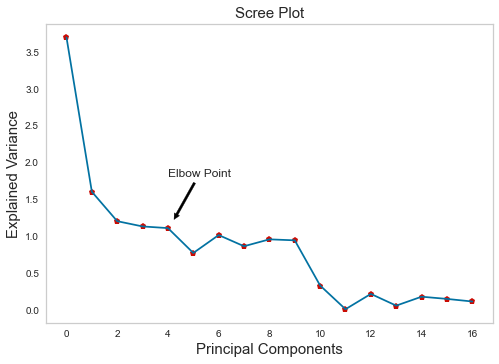

In [58]:
#plotting scree plot to find the optimal number og principal components
plt.plot(eigen_val,'rp')
plt.plot(eigen_val)
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      
plt.annotate(text ='Elbow Point', xy=(4.2,1.2), xytext=(4, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))
plt.grid(False)
plt.show()

🙌🙌 from the above scree plot , we can observe that after the elbow point the principal component do not contribute much to the data so, only first 5 components are expalining most of the variation and also kaiser critrion find the same

📝to confirm our observation further lets find the %age of explained variation

In [59]:
#calculating percentage of explained variation
percent_variation=[]
for i in eigen_val:
    variation=(i/sum(eigen_val))*100
    percent_variation.append(variation)
    
print('percent_variation :',percent_variation)

percent_variation : [25.828648086588395, 11.186190442556837, 8.394074144411945, 7.895173977268005, 7.7379971990412, 5.378720669456393, 7.0775016828032955, 6.017054223519317, 6.671837989622041, 6.577016000483166, 2.2901084354295334, 0.04313180023335128, 1.4945790629729092, 0.38288472977809895, 1.2302458311271227, 1.0200833950273254, 0.7747523296810523]


In [60]:
#calculation cumuulative sum 
np.cumsum(percent_variation)

array([ 25.82864809,  37.01483853,  45.40891267,  53.30408665,
        61.04208385,  66.42080452,  73.4983062 ,  79.51536043,
        86.18719842,  92.76421442,  95.05432285,  95.09745465,
        96.59203371,  96.97491844,  98.20516428,  99.22524767,
       100.        ])

📝the first `5` principle components are explaining approximately `61` percent variation in the data, for `95` percent variation we have to consider first **11** principle components, for this data lets consider the 5 principle components i.e 61.5 % variation

In [61]:
#intiating PCA
pca=PCA(n_components=5 ,random_state=10)
components=pca.fit_transform(df1)

In [62]:
#creating dataframe of transformed data
pca_sk_l=pd.DataFrame(data=components ,columns=['PC1', 'PC2', 'PC3','PC4','PC5'])
pca_sk_l.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.873744,2.578823,-0.314916,-1.941178,-1.222005
1,-1.483634,-0.245660,-0.493082,-0.766585,-0.088753
2,-2.936160,2.652461,0.961290,1.812131,-0.450694
3,-2.907398,2.754496,0.616593,-0.030932,-0.536802
4,-1.194917,-0.657993,0.366844,0.862540,1.080963


💹**Interpretation:** by doing the above steps we obtained the data with reduce dimensions, the new dataset has  observations12330 and 5 columns i.e, we reduced the number of features from 21 to 5

# 🧮Creating new models by using pca transformed data

# Performing K-means

*finding the cluster sum of square(wcss) for the number (1,10)*

In [63]:
#creating empty list
wcss=[]
#performing k-means for optimal value of k
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=10)
    #fitting the model using fit()
    kmeans_model=kmeans.fit(pca_sk_l)
    kmeans_wcss=kmeans_model.inertia_
    wcss.append(kmeans_wcss)

In [64]:
print('wcss' ,wcss)

wcss [107686.5555558744, 75145.29574579882, 55240.24810901792, 44208.1867824391, 38015.01379249483, 32794.96928725153, 29293.325455069124, 26511.51659431068, 24662.923579427734]


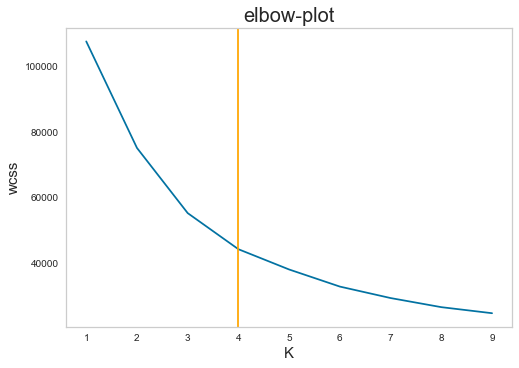

In [65]:
#plotting elbow to visualize the otimal value of k
plt.plot(range(1,10),wcss)
plt.title('elbow-plot',fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.axvline(x=4,color='Orange')
plt.grid(False)
plt.show()

💹**INTERPRETATION**:In this elbow plot there is a elbow point for k=4, before this elbow point the value of k is decreasing slowly but after after k=4 , the value of k is dcreasing slowly.

Lets consider silhoutte score method to validate the optimal value of k that we found using elbow plot

In [66]:
#calculating silhoutte score
silhoutte=[]
#creating a list of value of k
n_cluster=[2,3,4,5,6,7,8,9]
#performing k-means for optimal value of k
for i in n_cluster:
    kmeans=KMeans(n_clusters=i ,random_state=10)
    #fitting the model using fit()
    predict=kmeans.fit_predict(pca_sk_l)
    score=silhouette_score(pca_sk_l,predict,random_state=10)
    silhoutte.append(score)
    print('for {} clusters silhoutte score is {})'.format(i ,score))

for 2 clusters silhoutte score is 0.4042133020312345)
for 3 clusters silhoutte score is 0.4256773318282379)
for 4 clusters silhoutte score is 0.44383217002107395)
for 5 clusters silhoutte score is 0.38547613062261127)
for 6 clusters silhoutte score is 0.30915647991479944)
for 7 clusters silhoutte score is 0.3238484136986192)
for 8 clusters silhoutte score is 0.3261953380165352)
for 9 clusters silhoutte score is 0.3308134180165492)


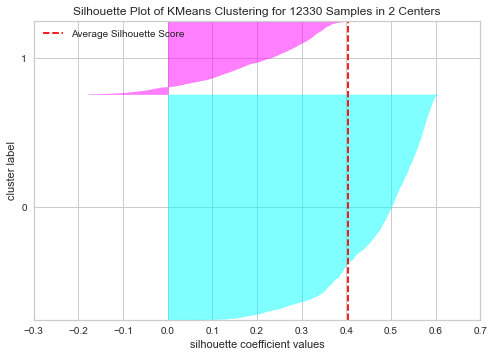

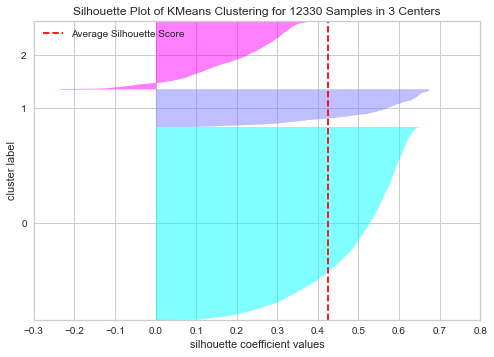

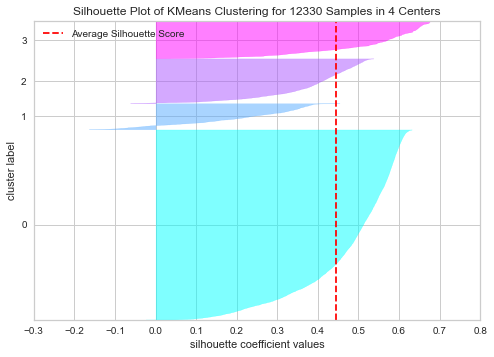

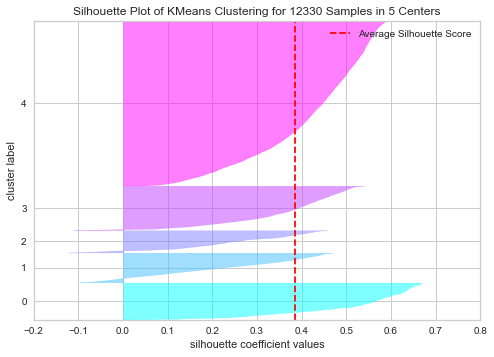

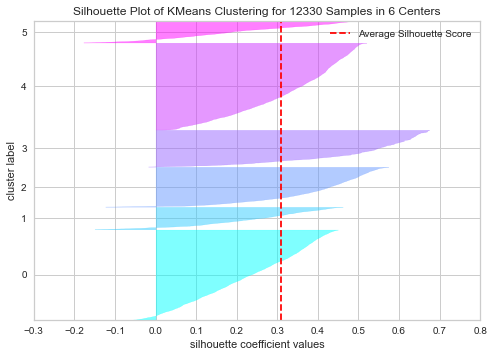

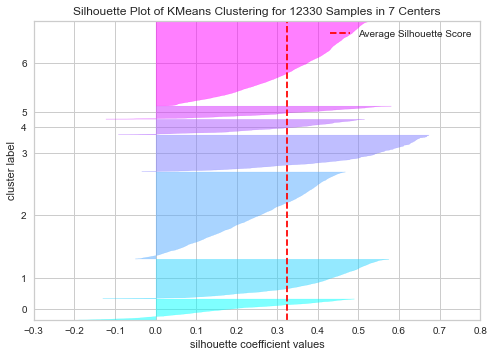

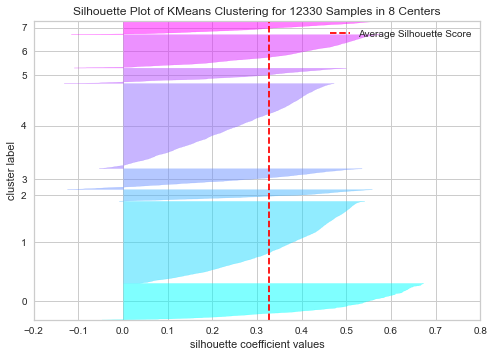

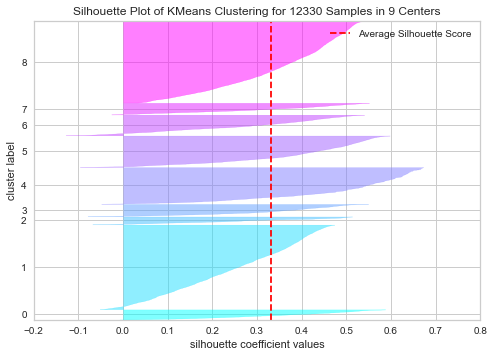

In [67]:
#plotting silhoutte plot 
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
X,y=load_credit()
X=pca_sk_l
n_cluster=[2,3,4,5,6,7,8,9]
for i in n_cluster:
    kmeans=KMeans(n_clusters=i ,random_state=10)
    silhouette_visualizer(estimator=kmeans, X=pca_sk_l,colors='cool')

**Interpretation**:'💹by visualizing the above silhoutte plot , we can see that thare are outliers( where the coefficients is less than 0) for clusters 2,3,4,5,6,7,8,9 , but comparing to all cluster for k =4 silhoutte score is high and and also have less outliers **'🧮so the optimal value of k is 4

In [68]:
#building the cluster using k-mean for the optimal value of k
clustersk=KMeans(n_clusters=4,random_state=10)
#fitting the model using fit()
clustersk.fit(pca_sk_l)
pca_sk_l['Kmeans_clusterspca']=clustersk.labels_

# **Analizing clusters**

In [71]:
#checking the size of each cluster and plotting it using bar graph
x=pca_sk_l['Kmeans_clusterspca'].value_counts().sort_index(ascending=True)
x

0    7872
1    1074
2    1848
3    1536
Name: Kmeans_clusterspca, dtype: int64

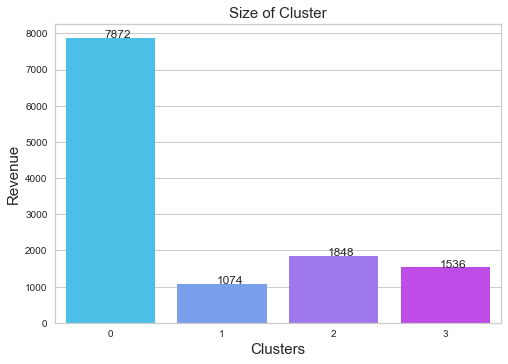

In [72]:
sns.barplot(x=x.index ,y=x.values, palette='cool')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.text(x=-0.05 ,y=x[0]+1 ,s=x[0])
plt.text(x=0.95 ,y=x[1]+1 ,s=x[1])
plt.text(x=1.95 ,y=x[2]+1 ,s=x[2])
plt.text(x=2.95 ,y=x[3]+1 ,s=x[3])

plt.show()

📝FIrst cluster has highest numbers of cluster points i.e 7872 cluster points

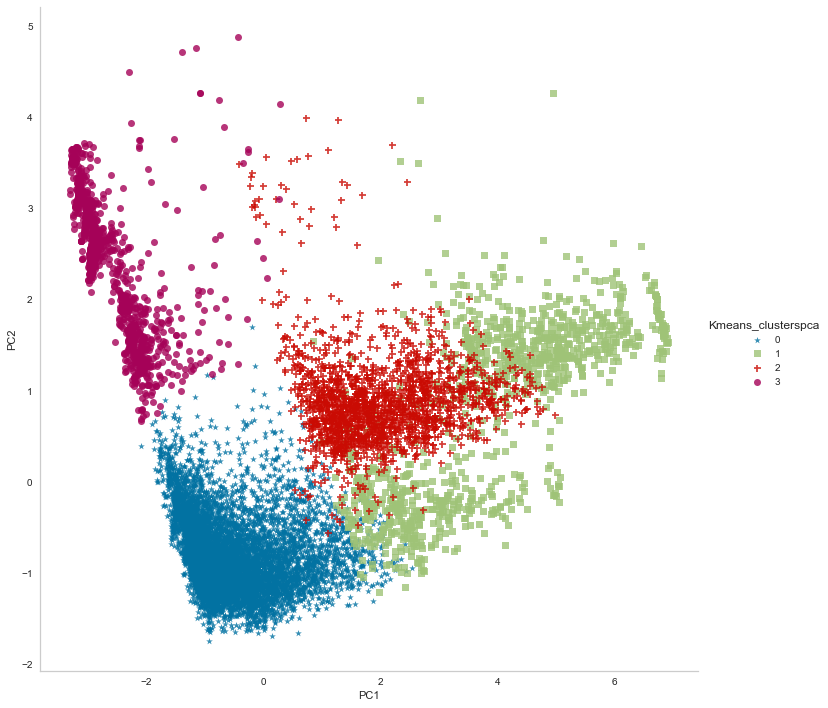

In [73]:
#analysing cluster with the help of scatter plot
sns.lmplot(data=pca_sk_l ,x='PC1',y='PC2' ,hue='Kmeans_clusterspca',markers=['*', ',','+','o'],size=10,fit_reg=False)
plt.grid(False)
plt.show()

'🧮**Interpretation**:By visualizing the cluster we can say that

1.the cluster represented by the `Bluestar(✡️)` has largest number of clusters then followed by `RedPLus(➕)` and then by `winecolor circle(⭕)` and then by `Greensquare(🟩)`  

2.We can see some of the clusters are overlapped beacause dimension of dataset is more than two and we have only consider two variables to plot the cluster

# ⌨️as we can see that after pca tranformation clusters are well separated and each point in each clusters are well packed from the previous standard scaled data model. also the silhoutte score is improved for each clusters. so we can say that pca transformation has done a good job but somehow Data interpretability is lost after pca transformation.

                             🧮Business Insights🧮

🧮**In all clusters  vistors have visted product related page most and the revenue generated by product related page is also greater than the other pages so product related page can become our target, and companies can list more new products to increase their revenue**.🧮

